In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfs = {i: pd.read_csv(f"halpha results/NB{i}_halpha_results.csv") for i in [1,2,3,6]}

In [3]:
colors = plt.cm.tab10.colors  # 10 distinct colors

In [4]:
center_pixels = {
    1: 190,
    2: 191,
    3: 192,
    6: 190,}


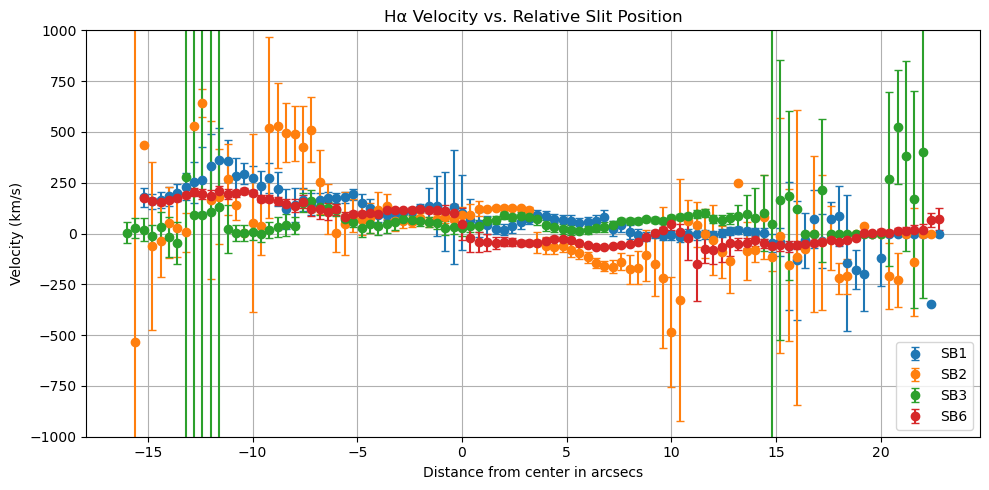

In [5]:
# --- Velocity plot ---
fig, ax = plt.subplots(figsize=(10,5))
for i, df in dfs.items():
    x_rel = (df["center"] - center_pixels[i]) * 0.4  # arcsec

    ax.errorbar(
        x_rel, df["velocity"], yerr=df["velocity_err"],
        fmt="o", capsize=3, label=f"SB{i}"
    )
    
ax.set_ylim(-1000,1000)
#ax.set_xlim(-20,30)
ax.set_xlabel("Distance from center in arcsecs")
ax.set_ylabel("Velocity (km/s)")
ax.set_title("Hα Velocity vs. Relative Slit Position")
ax.legend()
ax.grid(True)
fig.tight_layout()

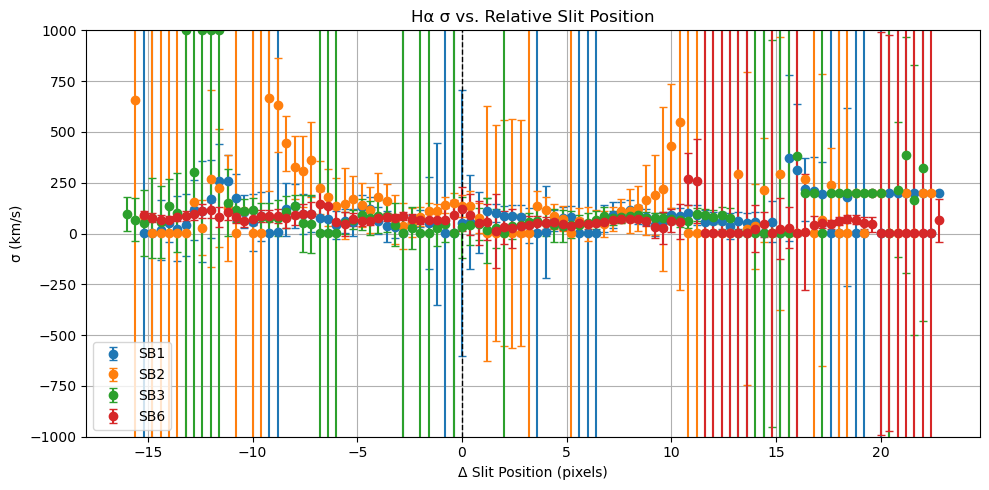

In [6]:
# --- Dispersion plot ---
fig, ax = plt.subplots(figsize=(10,5))
for i, df in dfs.items():
    x_rel = (df["center"] - center_pixels[i]) *0.4
    ax.errorbar(
        x_rel, df["dispersion"], yerr=df["dispersion_err"],
        fmt="o", capsize=3, label=f"SB{i}")
ax.set_ylim(-1000,1000)

ax.set_xlabel("Δ Slit Position (pixels)")
ax.set_ylabel("σ (km/s)")
ax.set_title("Hα σ vs. Relative Slit Position")
ax.axvline(0, color="black", ls="--", lw=1)
ax.legend()
ax.grid(True)
fig.tight_layout()

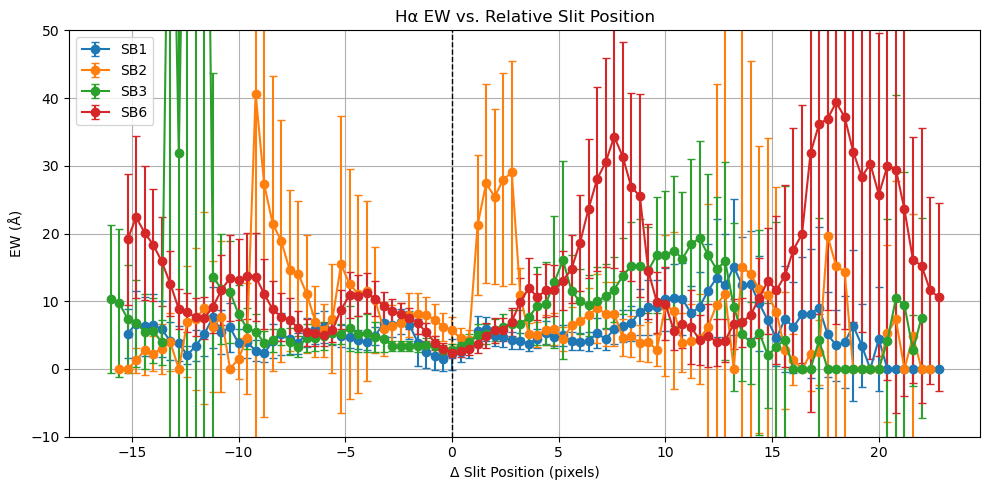

In [7]:
# --- Equivalent Width plot ---
fig, ax = plt.subplots(figsize=(10,5))
for i, df in dfs.items():
    x_rel = (df["center"] - center_pixels[i]) *0.4
    ax.errorbar(
        x_rel, df["EW"], yerr=df["EW_err"],
        fmt="o-", capsize=3, label=f"SB{i}")
    
ax.set_ylim(-10,50)
ax.set_xlabel("Δ Slit Position (pixels)")
ax.set_ylabel("EW (Å)")
ax.set_title("Hα EW vs. Relative Slit Position")
ax.axvline(0, color="black", ls="--", lw=1)
ax.legend()
ax.grid(True)
fig.tight_layout()


In [8]:
def weighted_mean(values, errors, mask):
    vals  = values[mask]
    errs  = errors[mask]
    if np.any(mask) and np.all(errs > 0):
        weights = 1 / errs**2
        return np.sum(weights * vals) / np.sum(weights)
    return np.nan

In [10]:
rows = []

for i, df in dfs.items():
    x_rel = (df["center"] - center_pixels[i]) * 0.4  # arcsec
    abs_x = np.abs(x_rel)

    center_mask = (abs_x < 0.2)
    bar_mask    = (abs_x >= 0.2) & (abs_x < 0.8)
    out_mask    = (abs_x >= 0.8) & (abs_x <= 1.2)

    rows.append({
    "NB": i,
    "v_center":   weighted_mean(df["velocity"], df["velocity_err"], center_mask),
    "v_bar":      weighted_mean(df["velocity"], df["velocity_err"], bar_mask),
    "v_out":      weighted_mean(df["velocity"], df["velocity_err"], out_mask),
    "σ_center":   weighted_mean(df["dispersion"], df["dispersion_err"], center_mask),
    "σ_bar":      weighted_mean(df["dispersion"], df["dispersion_err"], bar_mask),
    "σ_out":      weighted_mean(df["dispersion"], df["dispersion_err"], out_mask),
    "EW_center":  weighted_mean(df["EW"], df["EW_err"], center_mask),
    "EW_bar":     weighted_mean(df["EW"], df["EW_err"], bar_mask),
    "EW_out":     weighted_mean(df["EW"], df["EW_err"], out_mask),
})


summary_df = pd.DataFrame(rows)


In [11]:
summary_df

,NB,v_center,v_bar,v_out,σ_center,σ_bar,σ_out,EW_center,EW_bar,EW_out
0,1,102.746975,75.859866,51.276848,52.213123,58.217644,56.110979,2.179121,2.000235,2.683495
1,2,92.078763,77.895622,96.807015,133.849721,144.585079,126.143954,5.720249,5.171497,5.133562
2,3,25.624658,35.611123,34.140632,30.153275,41.381254,46.884111,2.876235,3.052647,3.668528
3,6,46.747231,61.227620,74.985686,119.131427,91.384535,61.832029,2.434307,2.807796,3.446801


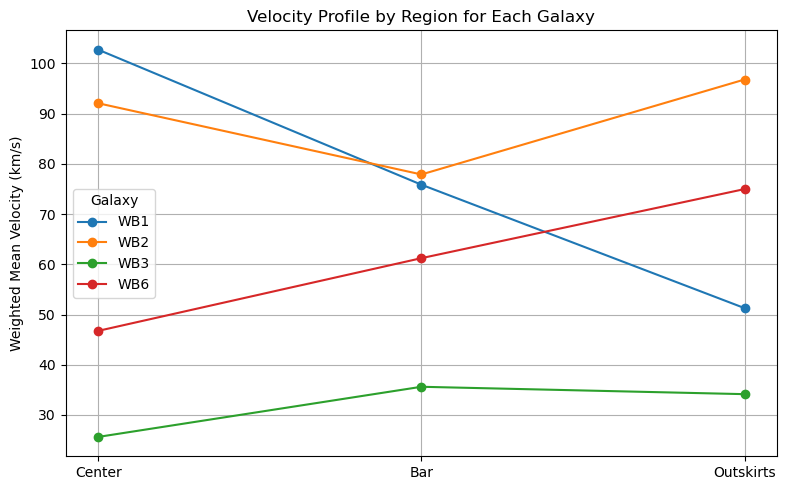

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

x_labels = ["Center", "Bar", "Outskirts"]
x_pos = np.arange(len(x_labels))

for _, row in summary_df.iterrows():
    velocities = [row["v_center"], row["v_bar"], row["v_out"]]
    ax.plot(x_pos, velocities, marker='o', label=f"WB{int(row['NB'])}")

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Weighted Mean Velocity (km/s)")
ax.set_title("Velocity Profile by Region for Each Galaxy")
ax.legend(title="Galaxy")
ax.grid(True)

plt.tight_layout()
plt.show()


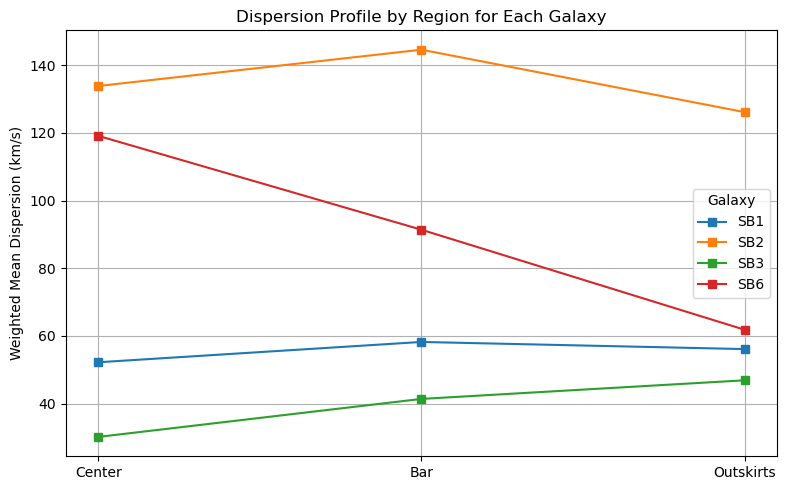

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

x_labels = ["Center", "Bar", "Outskirts"]
x_pos = np.arange(len(x_labels))

for _, row in summary_df.iterrows():
    dispersions = [row["σ_center"], row["σ_bar"], row["σ_out"]]
    ax.plot(x_pos, dispersions, marker='s', label=f"SB{int(row['NB'])}")

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Weighted Mean Dispersion (km/s)")
ax.set_title("Dispersion Profile by Region for Each Galaxy")
ax.legend(title="Galaxy")
ax.grid(True)

plt.tight_layout()
plt.show()


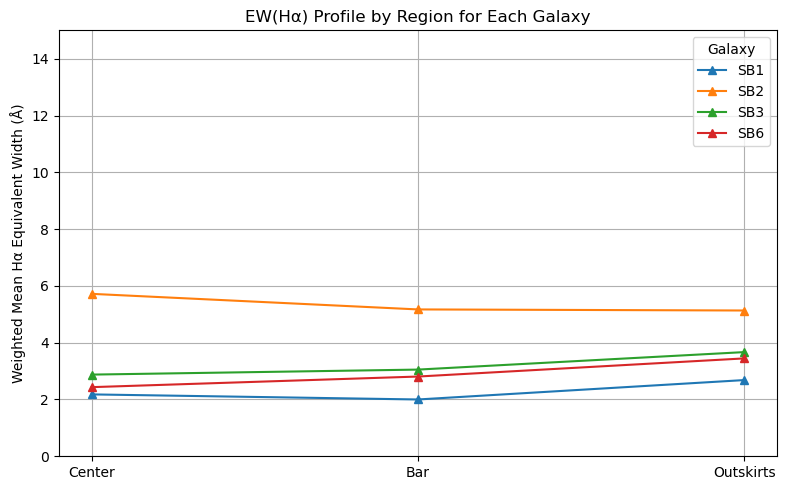

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

for _, row in summary_df.iterrows():
    ews = [row["EW_center"], row["EW_bar"], row["EW_out"]]
    ax.plot(x_pos, ews, marker='^', label=f"SB{int(row['NB'])}")

ax.set_xticks(x_pos)
ax.set_ylim(0,15)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Weighted Mean Hα Equivalent Width (Å)")
ax.set_title("EW(Hα) Profile by Region for Each Galaxy")
ax.legend(title="Galaxy")
ax.grid(True)

plt.tight_layout()
plt.show()
